In [2]:
import numpy as np
import pandas as pd
V1 = np.array([2,3,5,np.NaN,7,1,np.NaN,10,14])
V2 = np.array([8,np.NaN,5,8,11,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,13,5,6,13,7,np.NaN,3,30])
df = pd.DataFrame(
        {"Var1" : V1,
         "Var2" : V2,
         "Var3" : V3}
)
df

,Var1,Var2,Var3
0,2.0,8.0,NaN
1,3.0,NaN,13.0
2,5.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,11.0,13.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,10.0,2.0,3.0
8,14.0,3.0,30.0


In [3]:
df.apply(lambda x : x.fillna(x.mean()))

,Var1,Var2,Var3
0,2.0,8.000000,11.0
1,3.0,6.166667,13.0
2,5.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,11.000000,13.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,10.0,2.000000,3.0
8,14.0,3.000000,30.0


In [4]:
df.mean()

Var1     6.000000
Var2     6.166667
Var3    11.000000
dtype: float64

In [5]:
df.fillna(df.mean())

,Var1,Var2,Var3
0,2.0,8.000000,11.0
1,3.0,6.166667,13.0
2,5.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,11.000000,13.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,10.0,2.000000,3.0
8,14.0,3.000000,30.0


In [6]:
pd.notna(df)

,Var1,Var2,Var3
0,True,True,False
1,True,False,True
2,True,True,True
3,False,True,True
4,True,True,True
5,True,False,True
6,False,False,False
7,True,True,True
8,True,True,True


In [7]:
df.where(pd.notna(df),df.mean(), axis=1)

,Var1,Var2,Var3
0,2.0,8.000000,11.0
1,3.0,6.166667,13.0
2,5.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,11.000000,13.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,10.0,2.000000,3.0
8,14.0,3.000000,30.0


In [8]:
df.fillna("FILL")

,Var1,Var2,Var3
0,2,8,FILL
1,3,FILL,13
2,5,5,5
3,FILL,8,6
4,7,11,13
5,1,FILL,7
6,FILL,FILL,FILL
7,10,2,3
8,14,3,30


In [9]:
Var1 = np.array([1,3,6,np.NaN,7,1,9,np.NaN,15])
Var2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
Var3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
Var4 = np.array(["IT","IT","IT","HR","HR","HR","HR","IT","IT"])
df = pd.DataFrame(
        {"salary" : Var1,
         "Var2" : Var2,
         "Var3" : Var3,
         "department" : Var4}
)
df

,salary,Var2,Var3,department
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
2,6.0,5.0,5.0,IT
3,NaN,8.0,6.0,HR
4,7.0,12.0,14.0,HR
5,1.0,NaN,7.0,HR
6,9.0,NaN,NaN,HR
7,NaN,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [11]:
df.groupby("department")["salary"].mean().round(2)

department
HR    5.67
IT    6.25
Name: salary, dtype: float64

In [12]:
df.salary.fillna({0:1,1:2,2:3,3:4,4:5,5:6,6:7,7:8,8:9})

0     1.0
1     3.0
2     6.0
3     4.0
4     7.0
5     1.0
6     9.0
7     8.0
8    15.0
Name: salary, dtype: float64

In [13]:
df.groupby("department")["salary"].transform("mean")

0    6.250000
1    6.250000
2    6.250000
3    5.666667
4    5.666667
5    5.666667
6    5.666667
7    6.250000
8    6.250000
Name: salary, dtype: float64

In [15]:
df["salary"].fillna(df.groupby("department")["salary"].transform("mean"))

0     1.000000
1     3.000000
2     6.000000
3     5.666667
4     7.000000
5     1.000000
6     9.000000
7     6.250000
8    15.000000
Name: salary, dtype: float64

In [16]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V4 = np.array(["IT",np.nan,"HR","HR","HR","HR",np.nan,"IT","HR"], dtype=object)
df = pd.DataFrame(
        {"salary" : V1,
        "department" : V4}
)
df

,salary,department
0,1.0,IT
1,3.0,NaN
2,6.0,HR
3,NaN,HR
4,7.0,HR
5,1.0,HR
6,NaN,NaN
7,9.0,IT
8,15.0,HR


In [17]:
df["department"].mode()

0    HR
dtype: object

In [20]:
df["department"].fillna(df["department"].mode()[0])

0    IT
1    HR
2    HR
3    HR
4    HR
5    HR
6    HR
7    IT
8    HR
Name: department, dtype: object

In [22]:
df["department"].fillna(method = "bfill")

0    IT
1    HR
2    HR
3    HR
4    HR
5    HR
6    IT
7    IT
8    HR
Name: department, dtype: object

In [23]:
df["department"].fillna(method = "ffill")

0    IT
1    IT
2    HR
3    HR
4    HR
5    HR
6    HR
7    IT
8    HR
Name: department, dtype: object

In [26]:
import seaborn as sns
df = sns.load_dataset("diamonds")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [27]:
df = df.select_dtypes(include = ["int64","float64"])
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [28]:
df.isnull().sum()

carat    0
depth    0
table    0
price    0
x        0
y        0
z        0
dtype: int64

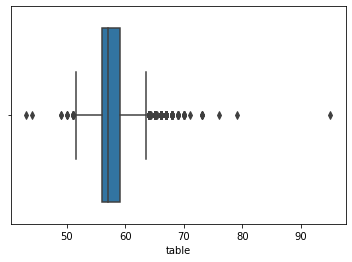

In [29]:
sns.boxplot(x = df.table)

In [33]:
Q1 = df.table.quantile(0.25)
Q1

56.0

In [34]:
Q3 = df.table.quantile(0.75)
Q3

59.0

In [36]:
IQR = Q3 - Q1
IQR

3.0

In [39]:
df.describe()["table"]

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

In [40]:
lower_lim = Q1 - 1.5 * IQR
lower_lim

51.5

In [41]:
upper_lim = Q3 + 1.5 * IQR
upper_lim

63.5

In [43]:
df.table < lower_lim

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [44]:
df.table > upper_lim

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [45]:
outlier_15_low = df.table < lower_lim

In [46]:
outlier_15_up = df.table > upper_lim

In [47]:
len(df.table[outlier_15_low])

16

In [48]:
len(df.table[outlier_15_up])

589

In [51]:
len(df.table) - len(df.table[outlier_15_up]) - len(df.table[outlier_15_low])

53335

In [52]:
df.table[(outlier_15_low | outlier_15_up)]

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64

In [53]:
df.table[~(outlier_15_low | outlier_15_up)]

0        55.0
1        61.0
3        58.0
4        58.0
5        57.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53335, dtype: float64

In [54]:
cleaned_df = df.table[~(outlier_15_low | outlier_15_up)]

In [55]:
cleaned_df

0        55.0
1        61.0
3        58.0
4        58.0
5        57.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53335, dtype: float64

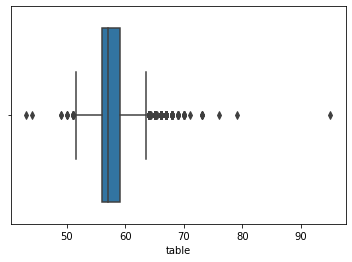

In [61]:
sns.boxplot(x = df.table)

In [66]:
from scipy.stats.mstats import winsorize

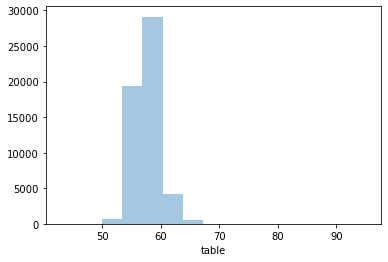

In [67]:
sns.distplot(df.table, bins = 15, kde = False)

In [70]:
df_table_win = winsorize(df.table, (0.01,0.02))

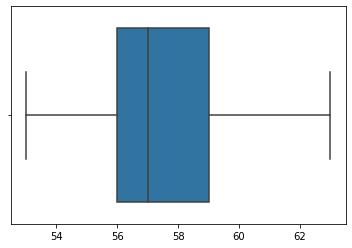

In [71]:
sns.boxplot(df_table_win)

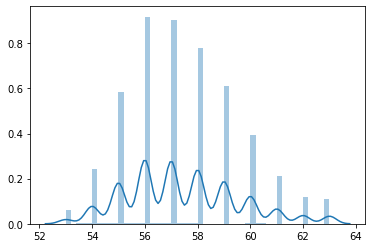

In [72]:
sns.distplot(df_table_win)